# Sentimenal Analaysis on President Speech

How does a president's speech affect their public image?

y: approval rates

x: emotions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from bs4 import BeautifulSoup

import selenium
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.action_chains import ActionChains

import re

import os
import glob
from pathlib import Path

import time
from datetime import datetime as dt

import requests

import urllib.request
from urllib.error import HTTPError

sns.set_style('darkgrid')
plt.style.use('ggplot')

In [ ]:
Project_dir = 'folder path for project'

### Scraping From Miller Center

In [ ]:
url = 'https://millercenter.org/the-presidency/presidential-speeches'

driver = selenium.webdriver.Chrome()
driver.get(url)

for i,j in enumerate(range(65)):
    ActionChains(driver).send_keys(Keys.PAGE_DOWN).perform()
    time.sleep(1)
    print(i)
    
current_page = driver.page_source

In [3]:
soup = BeautifulSoup(current_page, 'html.parser')

link = [i['href'] for i in soup.find_all('a', href = True)]

page_links = []

for i in link:
    if re.findall('presidential-speeches/', i):
        i = f'https://millercenter.org/{i}'
        page_links.append(i)
        
page_links

['https://millercenter.org//the-presidency/presidential-speeches/february-21-2023-remarks-one-year-anniversary-ukraine-war',
 'https://millercenter.org//the-presidency/presidential-speeches/february-7-2023-state-union-address',
 'https://millercenter.org//the-presidency/presidential-speeches/september-21-2022-speech-77th-session-united-nations-general',
 'https://millercenter.org//the-presidency/presidential-speeches/september-1-2022-remarks-continued-battle-soul-nation',
 'https://millercenter.org//the-presidency/presidential-speeches/may-24-2022-remarks-school-shooting-uvalde-texas',
 'https://millercenter.org//the-presidency/presidential-speeches/march-26-2022-remarks-support-people-ukraine',
 'https://millercenter.org//the-presidency/presidential-speeches/march-1-2022-state-union-address',
 'https://millercenter.org//the-presidency/presidential-speeches/february-24-2022-remarks-russian-invasion-ukraine',
 'https://millercenter.org//the-presidency/presidential-speeches/january-6-202

In [4]:
soups = []

driver = selenium.webdriver.Chrome()

for i,j in enumerate(page_links):
    driver.get(j)

    try:
        download = driver.find_element(By.ID, 'popup-trigger')
        download.click()

        time.sleep(2)
        
        current_page = driver.page_source

        soup = BeautifulSoup(current_page, 'html.parser')
        soups.append(soup)
    
    except NoSuchElementException:
        continue
    
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
116
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
27

In [ ]:
audio_dir = 'subfolder path for audio files'

In [74]:
header = []
names = []
dates = []
sources = []
overviews = []
transcripts = []
paths = []
links = []


for k,j in enumerate(soups):
    try:
        link = [i['href'].replace(' ', '') for i in j.find_all('a', href = True)]
        name = [i.text for i in j.find_all('p', class_ = 'president-name')][0]
        date = [i.text for i in j.find_all('p', class_ = 'episode-date')][0]
        source = [i.text for i in j.find_all('span', class_ = 'speech-loc')][0]
        view = [i.text for i in j.find_all('div', class_ = 'about-sidebar--intro')][0]
        title = [i.text.replace('\n', '').replace('"', '') for i in j.find_all('h2', class_ = 'presidential-speeches--title')][0]
        transcript = ''.join([i.text for i in j.select('#dp-expandable-text p')]).replace('\xa0', '')
        print(k)
    except:
        print(f'skip {k}')
        continue
    
    
    for i in link:
        if re.findall('audio', i):
            path = fr"{audio_dir}\{re.sub(r'[,:;/]', '', title).replace(' ', '_')}.mp4"
            
            try:
                urllib.request.urlretrieve(i, path)
            
                print(i)
                                    
                header.append(title)
                names.append(name)
                dates.append(date)
                sources.append(source)
                overviews.append(view)
                transcripts.append(transcript)
                paths.append(path)
                links.append(i)
            
                time.sleep(10)
            except HTTPError:
                print('fail')
                continue
           

0
https://dvydlafohk4qa.cloudfront.net/audio/biden_remarks_ukraine_oneyear_anniversary.mp3?download=1
1
https://dvydlafohk4qa.cloudfront.net/audio/biden_SOTU_2023.mp3?download=1
2
https://dvydlafohk4qa.cloudfront.net/audio/biden_remarks_UN_2022_09_21.mp3?download=1
3
https://dvydlafohk4qa.cloudfront.net/audio/biden_philadelphia_2022_09_01.mp3?download=1
4
https://dvydlafohk4qa.cloudfront.net/audio/biden_remarks_uvalde_may_24_2022.mp3?download=1
5
https://dvydlafohk4qa.cloudfront.net/audio/biden_ukraine_efforts_mar_26_2022.mp3?download=1
6
https://d4q9blt8qjhv3.cloudfront.net/americanpresident/audio/biden_SOTU_2022.mp3?download=1
7
https://d4q9blt8qjhv3.cloudfront.net/americanpresident/audio/biden_russia_ukriane_2022_02_24.mp3?download=1
8
https://d4q9blt8qjhv3.cloudfront.net/americanpresident/audio/Biden_capitol_assault_anniversary.mp3?download=1
skip 9
10
https://d4q9blt8qjhv3.cloudfront.net/americanpresident/audio/President_Biden_Delivers_Remarks_on_his_Plan_to_Stop_the_Delta_Variant

In [77]:
data = pd.DataFrame({'date': dates, 
                     'speaker': names, 
                     'header': header, 
                     'source': sources, 
                     'summary': overviews, 
                     'transcript':transcripts, 
                     'link': links, 
                     'path': paths})

data

,date,speaker,header,source,summary,transcript,link,path
0,"February 21, 2023",Joe Biden,"February 21, 2023: Remarks on the One-Year Ann...",The White House,"Speaking at the Royal Castle in Warsaw, Poland...","THE PRESIDENT: Hello, Poland! One of our great...",https://dvydlafohk4qa.cloudfront.net/audio/bid...,C:\Users\magil\OneDrive\Documents\Summer_Proje...
1,"February 07, 2023",Joe Biden,"February 7, 2023: State of the Union Address",The White House,"In his State of the Union Address, President J...",Mr. Speaker. Madam Vice President. Our First L...,https://dvydlafohk4qa.cloudfront.net/audio/bid...,C:\Users\magil\OneDrive\Documents\Summer_Proje...
2,"September 21, 2022",Joe Biden,"September 21, 2022: Speech before the 77th Ses...",The White House,President Joe Biden addresses the 77th session...,"Thank you.Mr. President, Mr. Secretary-General...",https://dvydlafohk4qa.cloudfront.net/audio/bid...,C:\Users\magil\OneDrive\Documents\Summer_Proje...
3,"September 01, 2022",Joe Biden,"September 1, 2022: Remarks on the Continued Ba...",The White House,"President Joe Biden speaks in Philadelphia, Pe...","THE PRESIDENT: My fellow Americans, please, if...",https://dvydlafohk4qa.cloudfront.net/audio/bid...,C:\Users\magil\OneDrive\Documents\Summer_Proje...
4,"May 24, 2022",Joe Biden,"May 24, 2022: Remarks on School Shooting in Uv...",The White House,President Biden makes an impassioned plea to s...,"Good evening, fellow Americans.I had hoped, wh...",https://dvydlafohk4qa.cloudfront.net/audio/bid...,C:\Users\magil\OneDrive\Documents\Summer_Proje...
...,...,...,...,...,...,...,...,...
387,"July 19, 1940",Franklin D. Roosevelt,"July 19, 1940: Democratic National Convention",National Archives,President Roosevelt accepts the Democratic Par...,Members of the Convention-my friends:\nIt is v...,https://d4q9blt8qjhv3.cloudfront.net/audio/spe...,C:\Users\magil\OneDrive\Documents\Summer_Proje...
388,"June 10, 1940",Franklin D. Roosevelt,"June 10, 1940: Stab in the Back Speech",National Archives,The President condemns the actions of Mussolin...,"President Newcomb, my friends of the Universit...",https://d4q9blt8qjhv3.cloudfront.net/audio/spe...,C:\Users\magil\OneDrive\Documents\Summer_Proje...
389,"May 26, 1940",Franklin D. Roosevelt,"May 26, 1940: Fireside Chat 15: On National De...",National Archives,"Responding to Hitler's invasion of Denmark, No...",My friends:\nAt this moment of sadness through...,https://d4q9blt8qjhv3.cloudfront.net/audio/spe...,C:\Users\magil\OneDrive\Documents\Summer_Proje...
390,"September 03, 1939",Franklin D. Roosevelt,"September 3, 1939: Fireside Chat 14: On the Eu...",National Archives,Hours after Great Britain and France declare w...,My fellow Americans and my friends:\nTonight m...,https://d4q9blt8qjhv3.cloudfront.net/audio/spe...,C:\Users\magil\OneDrive\Documents\Summer_Proje...


In [78]:
#data.to_csv(r'C:\Users\magil\OneDrive\Documents\Summer_Project_2023\Pres_data.csv', index = False)

In [62]:
Pres_data = pd.read_csv('Pres_data.csv')
Pres_data['date'] = Pres_data['date'].apply(lambda x: dt.strptime(x, '%B %d, %Y'))
Pres_data

,date,speaker,header,source,summary,transcript,link,path
0,2023-02-21,Joe Biden,"February 21, 2023: Remarks on the One-Year Ann...",The White House,"Speaking at the Royal Castle in Warsaw, Poland...","THE PRESIDENT: Hello, Poland! One of our great...",https://dvydlafohk4qa.cloudfront.net/audio/bid...,C:\Users\magil\OneDrive\Documents\Summer_Proje...
1,2023-02-07,Joe Biden,"February 7, 2023: State of the Union Address",The White House,"In his State of the Union Address, President J...",Mr. Speaker. Madam Vice President. Our First L...,https://dvydlafohk4qa.cloudfront.net/audio/bid...,C:\Users\magil\OneDrive\Documents\Summer_Proje...
2,2022-09-21,Joe Biden,"September 21, 2022: Speech before the 77th Ses...",The White House,President Joe Biden addresses the 77th session...,"Thank you.Mr. President, Mr. Secretary-General...",https://dvydlafohk4qa.cloudfront.net/audio/bid...,C:\Users\magil\OneDrive\Documents\Summer_Proje...
3,2022-09-01,Joe Biden,"September 1, 2022: Remarks on the Continued Ba...",The White House,"President Joe Biden speaks in Philadelphia, Pe...","THE PRESIDENT: My fellow Americans, please, if...",https://dvydlafohk4qa.cloudfront.net/audio/bid...,C:\Users\magil\OneDrive\Documents\Summer_Proje...
4,2022-05-24,Joe Biden,"May 24, 2022: Remarks on School Shooting in Uv...",The White House,President Biden makes an impassioned plea to s...,"Good evening, fellow Americans.I had hoped, wh...",https://dvydlafohk4qa.cloudfront.net/audio/bid...,C:\Users\magil\OneDrive\Documents\Summer_Proje...
...,...,...,...,...,...,...,...,...
387,1940-07-19,Franklin D. Roosevelt,"July 19, 1940: Democratic National Convention",National Archives,President Roosevelt accepts the Democratic Par...,Members of the Convention-my friends:\nIt is v...,https://d4q9blt8qjhv3.cloudfront.net/audio/spe...,C:\Users\magil\OneDrive\Documents\Summer_Proje...
388,1940-06-10,Franklin D. Roosevelt,"June 10, 1940: Stab in the Back Speech",National Archives,The President condemns the actions of Mussolin...,"President Newcomb, my friends of the Universit...",https://d4q9blt8qjhv3.cloudfront.net/audio/spe...,C:\Users\magil\OneDrive\Documents\Summer_Proje...
389,1940-05-26,Franklin D. Roosevelt,"May 26, 1940: Fireside Chat 15: On National De...",National Archives,"Responding to Hitler's invasion of Denmark, No...",My friends:\nAt this moment of sadness through...,https://d4q9blt8qjhv3.cloudfront.net/audio/spe...,C:\Users\magil\OneDrive\Documents\Summer_Proje...
390,1939-09-03,Franklin D. Roosevelt,"September 3, 1939: Fireside Chat 14: On the Eu...",National Archives,Hours after Great Britain and France declare w...,My fellow Americans and my friends:\nTonight m...,https://d4q9blt8qjhv3.cloudfront.net/audio/spe...,C:\Users\magil\OneDrive\Documents\Summer_Proje...


In [63]:
print(Pres_data['speaker'].unique())
len(Pres_data['speaker'].unique())

['Joe Biden' 'Donald Trump' 'Barack Obama' 'George W. Bush' 'Bill Clinton'
 'George H. W. Bush' 'Ronald Reagan' 'Jimmy Carter' 'Gerald Ford'
 'Richard M. Nixon' 'Lyndon B. Johnson' 'John F. Kennedy'
 'Dwight D. Eisenhower' 'Harry S. Truman' 'Franklin D. Roosevelt']


15

### Difference in Difference

Opinion on the president will be represented by approval rates

Data collected from: https://ropercenter.cornell.edu/presidential-approval

In [64]:
Roper_excel = pd.ExcelFile(fr'{Project_dir}\Pres_Approval_Roper.xls')
sheet_names = Roper_excel.sheet_names
sheet_names

['Joe Biden',
 'Donald Trump',
 'Barack Obama',
 'George W. Bush',
 'Bill Clinton',
 'George H.W. Bush',
 'Ronald Reagan',
 'Jimmy Carter',
 'Gerald Ford',
 'Richard Nixon',
 'Lyndon B. Johnson',
 'John F. Kennedy',
 'Dwight D. Eisenhower',
 'Harry S. Truman',
 'Franklin D. Roosevelt']

In [65]:
Approval_data = pd.concat([pd.DataFrame(Roper_excel.parse(i)).sort_index(ascending=False).reset_index() for i in sheet_names], axis=0, ignore_index=True).iloc[:,1:] 
Approval_data['President'] = [n for l in [[i for k in range(len(Roper_excel.parse(i)))] for i in sheet_names] for n in l]
Approval_data['Polling Start'] = Approval_data['Polling Start'].apply(lambda x: dt.strptime(x, '%Y-%m-%d'))
Approval_data['Polling End'] = Approval_data['Polling End'].apply(lambda x: dt.strptime(x, '%Y-%m-%d'))
Approval_data

,Organization,Polling Start,Polling End,Approve,Disapprove,No Opinion,Sample Size,Sample Type,President
0,American Research Group,2023-05-17,2023-05-20,41,52,7,1100,NATIONALADULT,Joe Biden
1,Associated Press/NORC Center,2023-05-11,2023-05-15,40,59,1,1680,NATIONALADULT,Joe Biden
2,Reuters/Ipsos,2023-05-05,2023-05-07,40,54,6,1022,NATIONALADULT,Joe Biden
3,ABC News / Washington Post,2023-04-28,2023-05-03,36,56,8,1006,NATIONALADULT,Joe Biden
4,Fox,2023-04-21,2023-04-24,44,55,1,1004,REG_VOTERS,Joe Biden
...,...,...,...,...,...,...,...,...,...
6524,Gallup Organization,1938-07-04,1938-07-11,52,40,7,Not reported,Not reported,Franklin D. Roosevelt
6525,Gallup Organization,1938-05-29,1938-06-04,54,46,Not reported,Not reported,Not reported,Franklin D. Roosevelt
6526,Gallup Organization,1938-05-22,1938-05-27,54,46,Not reported,Not reported,Not reported,Franklin D. Roosevelt
6527,Gallup Organization,1937-10-30,1937-11-04,63,37,Not reported,Not reported,Not reported,Franklin D. Roosevelt


In [7]:
len(Approval_data['Organization'].unique())

99

In [66]:
example = Approval_data[(Approval_data['Organization'] == 'OPOR') & (Approval_data['President'] == 'Franklin D. Roosevelt')].reset_index(drop = True)
example

,Organization,Polling Start,Polling End,Approve,Disapprove,No Opinion,Sample Size,Sample Type,President
0,OPOR,1944-12-01,1944-12-01,72,22,6,1245,Not reported,Franklin D. Roosevelt
1,OPOR,1944-08-01,1944-08-01,70,25,5,1258,Not reported,Franklin D. Roosevelt
2,OPOR,1944-06-01,1944-06-01,69,21,9,552,Not reported,Franklin D. Roosevelt
3,OPOR,1944-03-01,1944-03-01,69,22,8,1264,Not reported,Franklin D. Roosevelt
4,OPOR,1941-01-31,1941-01-31,72,23,4,3168,Not reported,Franklin D. Roosevelt


### Difference in Difference

------------------------------------------poll-------------------------------------------speech----------------------------------------------------------poll-----------------------------------

-no poll in between poll and speech


-polls must be 30 days apart


-same president


-same organization



In [67]:
President_list = []
Organization_list = []

previous_start_list = []
previous_end_list = []
previous_approve_list = []
previous_disapprove_list = []

date_list = []

current_start_list = []
current_end_list = []
current_approve_list = []
current_disapprove_list = []

change_approve_list = []
change_disapprove_list = []

for i in Approval_data['Organization'].unique():
    for n in Approval_data['President'].unique():
        data = Approval_data[(Approval_data['Organization'] == i) & (Approval_data['President'] == n)].reset_index()
    
        for j in range(len(data)-1):
            for k in range(len(Pres_data)-1):
                if (data['Polling Start'][j+1] <= Pres_data['date'][k] <= data['Polling End'][j] and 
                    not data['Polling Start'][j+1] <= Pres_data['date'][k+1] <= Pres_data['date'][k] <= data['Polling End'][j]):
                    
                        President_list.append(data['President'][j])
                        Organization_list.append(data['Organization'][j])
                    
                        previous_start_list.append(data['Polling Start'][j+1])
                        previous_end_list.append(data['Polling End'][j+1])
                        previous_approve_list.append(data['Approve'][j+1])
                        previous_disapprove_list.append(data['Disapprove'][j+1])
                        
                        
                        current_start_list.append(data['Polling Start'][j])
                        current_end_list.append(data['Polling End'][j])
                        current_approve_list.append(data['Approve'][j])
                        current_disapprove_list.append(data['Disapprove'][j])
                        
                        date_list.append(Pres_data['date'][k])
                        
                        change_approve_list.append(data['Approve'][j]-data['Approve'][j+1])
                        change_disapprove_list.append(data['Disapprove'][j]-data['Disapprove'][j+1])

In [107]:
avg_approve_data = pd.DataFrame({'President': President_list,
                                 'Organization': Organization_list,
                                'current start poll':current_start_list,
                                 'current end poll':current_end_list,
                                 'current approval':current_approve_list,
                                 'current disapproval':current_disapprove_list,
                                 'previous start poll':previous_start_list,
                                 'previous end poll':previous_end_list,
                                 'previous approval':previous_approve_list,
                                 'previous disapproval':previous_disapprove_list,
                                 'date': date_list,
                                 'approval_rate_change':change_approve_list,
                                 'disapproval_rate_change':change_disapprove_list})
avg_approve_data

,President,Organization,current start poll,current end poll,current approval,current disapproval,previous start poll,previous end poll,previous approval,previous disapproval,date,approval_rate_change,disapproval_rate_change
0,Joe Biden,American Research Group,2023-03-17,2023-03-20,46,49,2023-02-17,2023-02-20,45,51,2023-02-21,1,-2
1,Joe Biden,American Research Group,2023-02-17,2023-02-20,45,51,2023-01-17,2023-01-20,41,54,2023-02-07,4,-3
2,Joe Biden,American Research Group,2022-10-17,2022-10-20,39,55,2022-09-17,2022-09-20,41,53,2022-09-21,-2,2
3,Joe Biden,American Research Group,2022-09-17,2022-09-20,41,53,2022-08-17,2022-08-20,37,57,2022-09-01,4,-4
4,Joe Biden,American Research Group,2022-06-17,2022-06-20,40,55,2022-05-17,2022-05-20,39,55,2022-05-24,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,Richard Nixon,ORC,1971-06-05,1971-06-06,54,33,1971-05-12,1971-05-23,48,36,1971-05-20,6,-3
1940,Richard Nixon,ORC,1971-05-12,1971-05-23,48,36,1971-05-06,1971-05-07,50,31,1971-05-20,-2,5
1941,Richard Nixon,ORC,1971-04-08,1971-04-08,52,32,1971-04-05,1971-04-06,54,31,1971-04-07,-2,1
1942,Franklin D. Roosevelt,OPOR,1944-08-01,1944-08-01,70,25,1944-06-01,1944-06-01,69,21,1944-06-05,1,4


<Axes: >

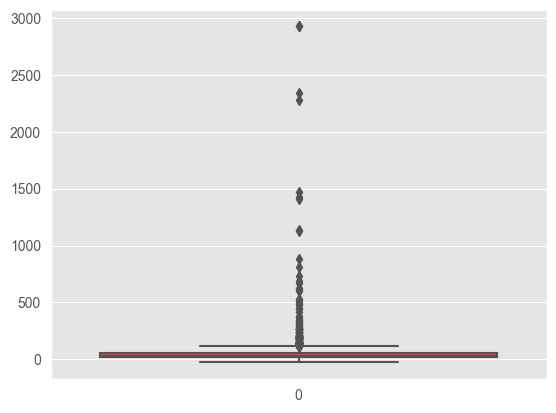

In [102]:
diff_date = avg_approve_data['current end poll'] - avg_approve_data['previous end poll']
diff_date = diff_date.apply(lambda x: int(str(x).split(' ')[0]))
sns.boxplot(diff_date)

In [106]:
avg_approve_data['difference date'] = diff_date
fixed_avg_approve_data = avg_approve_data[avg_approve_data['difference date'] <= 30]
fixed_avg_approve_data

,President,Organization,current start poll,current end poll,current approval,current disapproval,previous start poll,previous end poll,previous approval,previous disapproval,date,approval_rate_change,disapproval_rate_change,difference date
0,Joe Biden,American Research Group,2023-03-17,2023-03-20,46,49,2023-02-17,2023-02-20,45,51,2023-02-21,1,-2,28
2,Joe Biden,American Research Group,2022-10-17,2022-10-20,39,55,2022-09-17,2022-09-20,41,53,2022-09-21,-2,2,30
6,Joe Biden,American Research Group,2022-03-17,2022-03-20,45,51,2022-02-17,2022-02-20,44,52,2022-02-24,1,-1,28
10,Joe Biden,American Research Group,2021-07-17,2021-07-20,53,43,2021-06-17,2021-06-20,52,43,2021-07-08,1,0,30
12,Joe Biden,American Research Group,2021-05-17,2021-05-20,57,37,2021-04-17,2021-04-20,59,35,2021-04-28,-2,2,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,Bill Clinton,Yankelovich Partners / TIME / CNN,1993-02-18,1993-02-18,56,25,1993-02-10,1993-02-11,49,32,1993-02-17,7,-7,7
1937,Richard Nixon,ORC,1972-05-09,1972-05-10,57,33,1972-04-27,1972-04-29,52,35,1972-05-08,5,-2,11
1939,Richard Nixon,ORC,1971-06-05,1971-06-06,54,33,1971-05-12,1971-05-23,48,36,1971-05-20,6,-3,14
1940,Richard Nixon,ORC,1971-05-12,1971-05-23,48,36,1971-05-06,1971-05-07,50,31,1971-05-20,-2,5,16


If we have two approval_change(%) collected from different organization with overlapping differencing poll datas, we average them.

Exe:

Suppose poll 1 and 2 are from organization 1. Poll 1 was collected on Jan 1 to Jan 3 and Poll 2 was collected on Jan 6 to Jan 7


Suppose poll 3 and 4 are from organization 3. Poll 2 was collected Jan 2 to Jan 4 and Poll 2 was collected on Jan 6 to Jan 8


If a speech was on Jan 3, then we will calculate the change in approval rate for both organization, then average them

In [108]:
opinion_data = fixed_avg_approve_data[['date', 'approval_rate_change', 'disapproval_rate_change']].groupby('date').mean('approval_change(%)').reset_index()
opinion_data

,date,approval_rate_change,disapproval_rate_change
0,1939-09-03,6.500000,-2.0
1,1940-05-26,-4.000000,4.0
2,1940-06-10,-3.000000,4.0
3,1941-03-15,0.000000,-1.0
4,1941-05-27,0.000000,-2.0
...,...,...,...
273,2022-05-24,-1.000000,0.5
274,2022-09-01,0.500000,0.0
275,2022-09-21,-0.400000,0.8
276,2023-02-07,1.200000,0.0


In [109]:
data2 = Pres_data.merge(opinion_data, on='date', how = 'inner').rename(columns={'approval_rate_change': 'avg_approval_rate_change', 'disapproval_rate_change': 'avg_disapproval_rate_change'})
#data2.to_csv("Pres_data2.csv", index = False)

In [12]:
Pres_data2 = pd.read_csv('Pres_data2.csv')
Pres_data2[['speaker', 'path', 'avg_approval_rate_change']]

,speaker,path,avg_approval_rate_change
0,Joe Biden,C:\Users\magil\OneDrive\Documents\Summer_Proje...,-2.666667
1,Joe Biden,C:\Users\magil\OneDrive\Documents\Summer_Proje...,1.200000
2,Joe Biden,C:\Users\magil\OneDrive\Documents\Summer_Proje...,-0.400000
3,Joe Biden,C:\Users\magil\OneDrive\Documents\Summer_Proje...,0.500000
4,Joe Biden,C:\Users\magil\OneDrive\Documents\Summer_Proje...,-1.000000
...,...,...,...
273,Franklin D. Roosevelt,C:\Users\magil\OneDrive\Documents\Summer_Proje...,0.000000
274,Franklin D. Roosevelt,C:\Users\magil\OneDrive\Documents\Summer_Proje...,0.000000
275,Franklin D. Roosevelt,C:\Users\magil\OneDrive\Documents\Summer_Proje...,-3.000000
276,Franklin D. Roosevelt,C:\Users\magil\OneDrive\Documents\Summer_Proje...,-4.000000


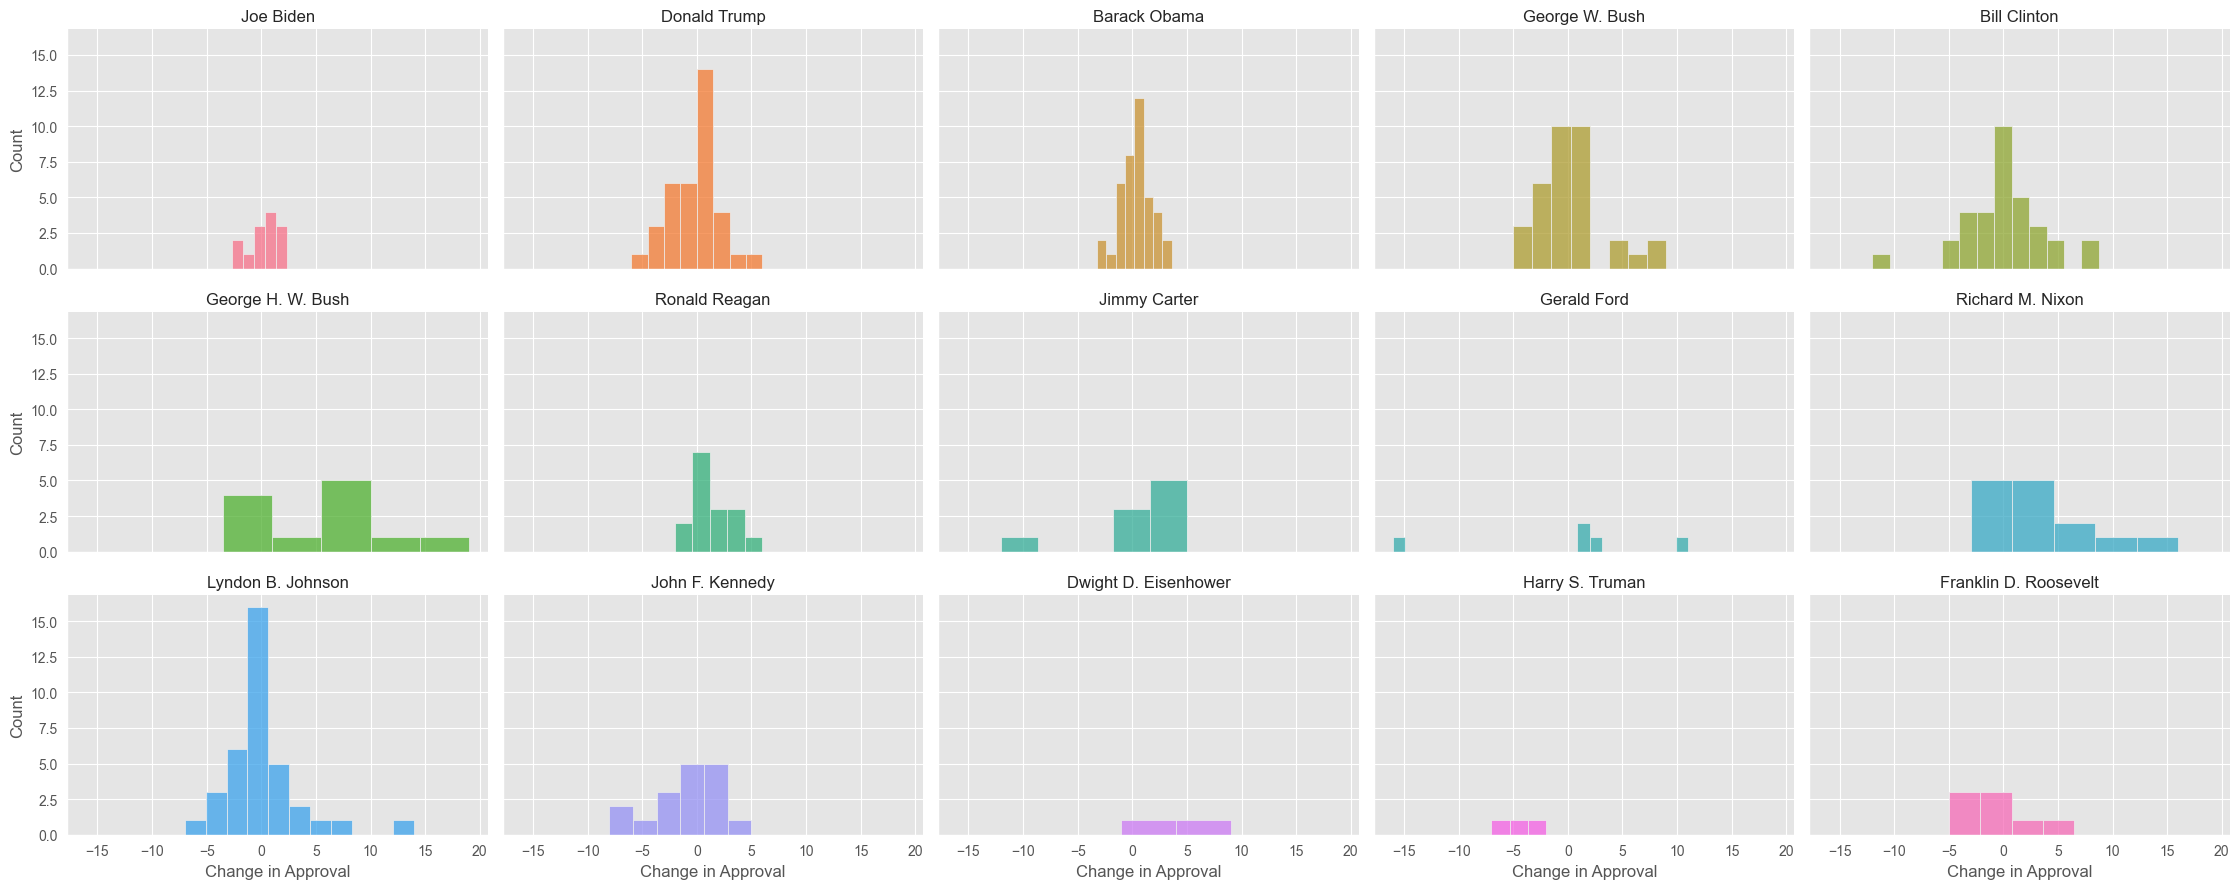

In [112]:
grid = sns.FacetGrid(data = data2, col = 'speaker', hue = 'speaker', col_wrap=5, aspect=1.5)
grid.map(sns.histplot, 'avg_approval_rate_change')

grid.set_titles("{col_name}")
grid.set_xlabels('Change in Approval')

grid.tight_layout()

plt.show()

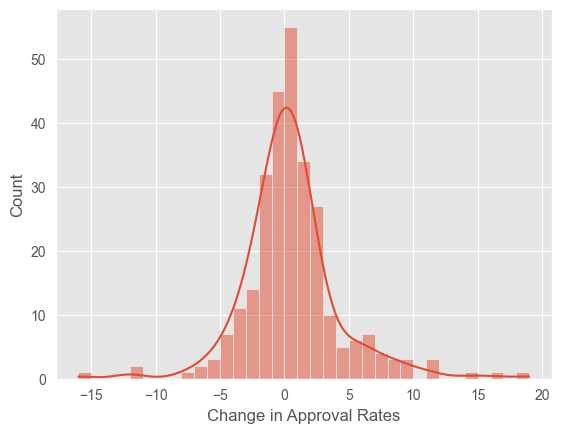

In [114]:
sns.histplot(data =Pres_data2, x='avg_approval_rate_change', kde=True).set_xlabel('Change in Approval Rates')
plt.show()

In [115]:
print(np.var(Pres_data2['avg_approval_rate_change']))
print(np.mean(Pres_data2['avg_approval_rate_change']))

14.129751542034038
0.45108386817019913
